<br/>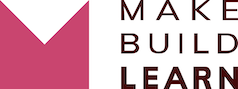<br/><br/>
<center style="color:#888">Visualización de datos</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Óscar Fernández Angulo</b><br>oscarfa@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center">Challenge S6: Natalidad y Estrellas</p><br/>

# Consideraciones previas

* Cada ejercicio se responderá con una sola figura y, si se considera necesario, un texto comentando los resultados.
* No existe una única respuesta correcta. 
* Se valorará positivamente usar diferentes tipos de gráficos durante el Challenge. Si no se repite ninguno, mejor.
* Los ejercicios están pensados para responderse con los conocimientos obtenidos en cualquiera de los Worksheets presentados hasta la fecha.

In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import cartopy
import pandas as pd
from shapely import wkt
import matplotlib
import contextily as ctx
import numpy as np
from pathlib import Path
import cartopy.feature as cfeature

# Seleccionamos un tamaño de letra que se pueda leer.
matplotlib.rcParams.update({'font.size': 14})

# Primera parte: Natalidad

Comencaremos con un dataset que nos indica la natalidad en cada una de las provincias de España.

In [2]:
spain_birthrate_df = gpd.read_file("natalidad.geojson")
spain_birthrate_df.head()

,NAME_1,NAME_2,CC_2,NAT2018,geometry
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."


In [3]:
spain_birthrate_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME_1    50 non-null     object  
 1   NAME_2    50 non-null     object  
 2   CC_2      50 non-null     object  
 3   NAT2018   50 non-null     float64 
 4   geometry  50 non-null     geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 2.1+ KB


## Ejercicio 1

¿Cómo se distribuye la natalidad en las diferentes comunidades autónomas? 

In [4]:
spain_birthrate_df.groupby('NAME_1').agg('mean').sort_values('NAT2018',ascending=False)

,NAT2018
NAME_1,
Región de Murcia,9.860000
Islas Baleares,8.710000
Comunidad de Madrid,8.700000
Cataluña,8.367500
Comunidad Foral de Navarra,8.340000
Andalucía,8.296250
Comunidad Valenciana,7.753333
País Vasco,7.630000
Castilla-La Mancha,7.578000


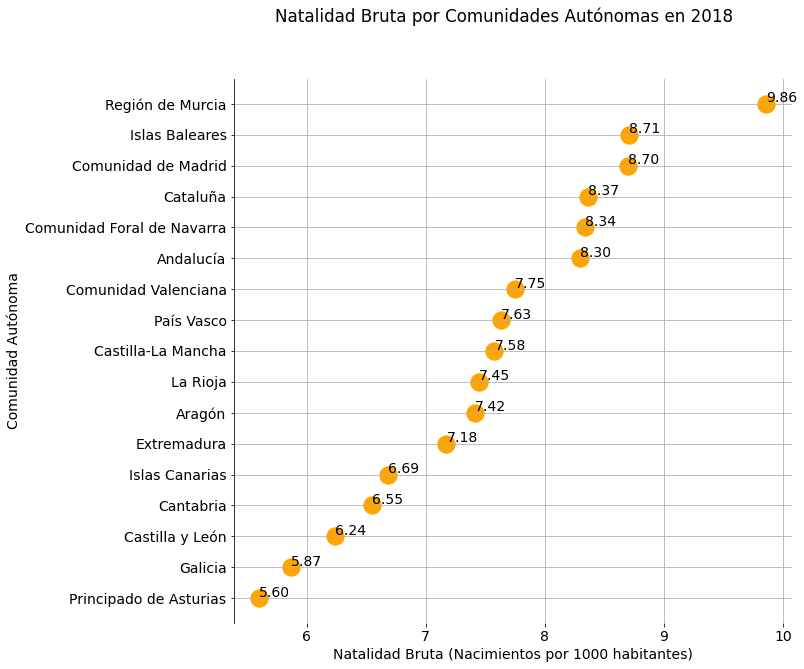

In [5]:
spain_cc_birthrate_df=spain_birthrate_df.groupby('NAME_1').agg('mean')
spain_cc_birthrate_df.sort_values('NAT2018',inplace=True)
cc=spain_cc_birthrate_df.index
birthrate= spain_cc_birthrate_df['NAT2018']

# Instanciamos la figura.
fig, ax = plt.subplots(figsize=(10, 10))

# Añadimos unas guías verticales.
ax.grid(True, axis='x')
# Representamos las líneas.
# ax.barh(cc, birthrate)


# Representamos estos valores.
ax.scatter(birthrate, cc, color='orange', s=300)

for index,data in enumerate(birthrate):
         ax.text(x=data,y=index, s="%.2f\n"%(data) , ha='left', va='center_baseline' ,fontdict=dict(fontsize=14))
    

ax.set_ylabel("Comunidad Autónoma")
ax.set_xlabel("Natalidad Bruta (Nacimientos por 1000 habitantes)")
# Representamos la cuadrícula vertical.
ax.grid(True)


# Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# Damos título a la figura
fig.suptitle('Natalidad Bruta por Comunidades Autónomas en 2018',);



## Ejercicio 2

Visualizar en un mapa la natalidad de todas las provincias.

In [6]:
# Transformamos el DataFrame en un GeoDataFrame.
spain_birthrate_df_copy=spain_birthrate_df.copy()
spain_province_birthrate_gdf = gpd.GeoDataFrame(spain_birthrate_df_copy, geometry='geometry')
spain_province_birthrate_gdf.sort_values('NAT2018',ascending=False)

,NAME_1,NAME_2,CC_2,NAT2018,geometry
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
49,Región de Murcia,Murcia,30,9.86,"MULTIPOLYGON (((-1.54680 37.40990, -1.54681 37..."
27,Cataluña,Girona,17,8.95,"MULTIPOLYGON (((3.18792 41.86319, 3.18792 41.8..."
41,Islas Baleares,Baleares,07,8.71,"MULTIPOLYGON (((1.42514 38.77681, 1.42514 38.7..."
7,Andalucía,Sevilla,41,8.71,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36..."
30,Comunidad de Madrid,Madrid,28,8.70,"MULTIPOLYGON (((-4.27502 40.67631, -4.26984 40..."
31,Comunidad Foral de Navarra,Navarra,31,8.34,"MULTIPOLYGON (((-1.84713 42.00800, -1.84898 42..."
29,Cataluña,Tarragona,43,8.26,"MULTIPOLYGON (((0.72958 40.78069, 0.72958 40.7..."
16,Castilla-La Mancha,Toledo,45,8.24,"MULTIPOLYGON (((-5.33994 39.89062, -5.36937 39..."
45,País Vasco,Álava,01,8.22,"MULTIPOLYGON (((-3.13116 42.75807, -3.14786 42..."


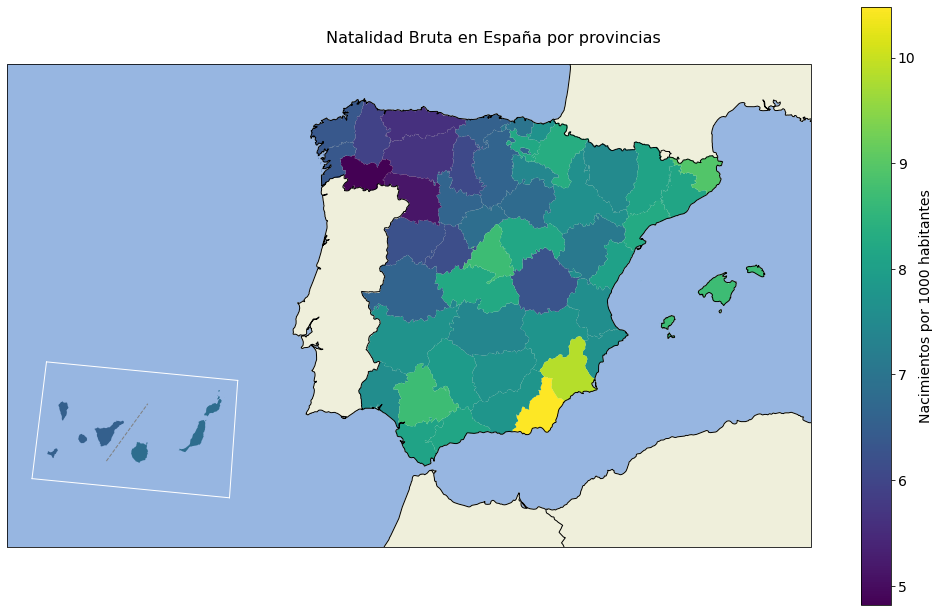

In [7]:
#Iniciamos los componentes del mapa.
fig, ax = plt.subplots(figsize=(18, 11), subplot_kw={
    'projection': gcrs.AlbersEqualArea(central_longitude=-3.75, central_latitude=40.47)
})


# Movemos Canarias.Lo que metemos en traslate es longitud y latitud que hay que sumar o restar a la que ya tiene.
canarias_filter = spain_province_birthrate_gdf['NAME_1']=='Islas Canarias'
spain_province_birthrate_gdf[canarias_filter] = spain_province_birthrate_gdf[canarias_filter].\
set_geometry(spain_province_birthrate_gdf[canarias_filter].translate(2,8))


# Representamos el mapa coroplético
cr = gplt.choropleth(
    spain_province_birthrate_gdf, 
    hue='NAT2018', 
    ax=ax, 
    legend=True,
    legend_kwargs={'label': "Nacimientos por 1000 habitantes",'orientation': "vertical"}
)


# Hacemos visible el contorno del gráfico.
ax.spines['geo'].set_visible(True)

# Representamos la líneas de costa.
ax.coastlines()

# Representamos las líndes de los países.
ax.add_feature(cartopy.feature.BORDERS)

# Establecemos el extent para que se vea de forma correcta juagando con las latitudes y longitudes
extent = [-17, 5, 34, 44]
ax.set_extent(extent)
ax.grid(True)

#Pintamos el cuadrado que rodea las Islas Canarias

a_lon, a_lat = -16.5, 37.65
b_lon, b_lat = -11, 37.65
ax.plot([a_lon, b_lon], [a_lat, b_lat],
         color='white', linestyle='-', linewidth=1,
         transform=cartopy.crs.PlateCarree(),
         )

a_lon, a_lat = -11, 37.65
b_lon, b_lat = -11, 35.15

ax.plot([a_lon, b_lon], [a_lat, b_lat],
         color='white', linestyle='-', linewidth=1,
         transform=cartopy.crs.PlateCarree(),
         )
a_lon, a_lat = -16.5, 35.15
b_lon, b_lat = -11, 35.15
ax.plot([a_lon, b_lon], [a_lat, b_lat],
         color='white', linestyle='-', linewidth=1,
         transform=cartopy.crs.PlateCarree(),
         )

a_lon, a_lat = -16.5, 35.15
b_lon, b_lat = -16.5, 37.65
ax.plot([a_lon, b_lon], [a_lat, b_lat],
         color='white', linestyle='-', linewidth=1,
         transform=cartopy.crs.PlateCarree(),
         )

# Separación provincial entre las provincias Canarias de Tenerife y Gran Canaria

a_lon, a_lat = -14.5, 35.7
b_lon, b_lat = -13.5, 37.0
ax.plot([a_lon, b_lon], [a_lat, b_lat],
         color='grey', linestyle='--', linewidth=1,
         transform=cartopy.crs.PlateCarree(),
         )


ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
#ax.add_feature(cartopy.feature.RIVERS)
#ax.gridlines()

fig.suptitle("Natalidad Bruta en España por provincias",x='0.5',y='0.85' ,fontsize=16);

# Segunda parte: Restaurantes

En la segunda parte trataremos con un dataset que almacena los restaurantes que fueron galardonados con algún premio de la guía michelín. [Dataset](https://www.kaggle.com/jackywang529/michelin-restaurants?select=two-stars-michelin-restaurants.csv).

In [8]:
#Leemos cada uno de los datasets de cada tipología de premios estrella Michelin
estrellas_michelin_1_df = pd.read_csv('datos/one-star-michelin-restaurants.csv',sep=',').reset_index(drop=True)
estrellas_michelin_2_df = pd.read_csv('datos/two-stars-michelin-restaurants.csv',sep=',').reset_index(drop=True)
estrellas_michelin_3_df = pd.read_csv('datos/three-stars-michelin-restaurants.csv',sep=',').reset_index(drop=True)

#Generamos una columna nueva en cada data frame indicando si son de 1, 2, o 3 estrellas
#los restaurantes registrados
estrellas_michelin_1_df['star']=1
estrellas_michelin_2_df['star']=2 
estrellas_michelin_3_df['star']=3

#Concatenamos los 3 dataframes en uno donde estarán recogido todos los restaurantes.
estrellas_michelin_df=pd.concat([estrellas_michelin_1_df,estrellas_michelin_2_df,estrellas_michelin_3_df]).reset_index(drop=True)

In [9]:
#Mostramos la info del nuevo dataframe
estrellas_michelin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       695 non-null    object 
 1   year       695 non-null    int64  
 2   latitude   695 non-null    float64
 3   longitude  695 non-null    float64
 4   city       693 non-null    object 
 5   region     695 non-null    object 
 6   zipCode    501 non-null    object 
 7   cuisine    695 non-null    object 
 8   price      519 non-null    object 
 9   url        695 non-null    object 
 10  star       695 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 59.9+ KB


In [10]:
estrellas_michelin_df.sample(5)

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,star
607,Daniel,2019,40.766600,-73.967450,New York,New York City,10065,French,$$$$,https://guide.michelin.com/us/en/new-york-stat...,2
56,Farmhouse Inn & Restaurant,2019,38.490390,-122.883500,San Francisco,California,95436,Californian,$$$$,https://guide.michelin.com/us/en/california/sa...,1
99,Monte,2019,45.082790,13.631168,Rovinj,Croatia,52210,Creative,$$$$$,https://guide.michelin.com/hr/en/istria/rovinj...,1
654,Dinner by Heston Blumenthal,2019,51.502080,-0.160110,Hyde Park,United Kingdom,SW1X 7LA,Traditional British,NaN,https://guide.michelin.com/gb/en/greater-londo...,2
76,Bistro Na's,2019,34.104412,-118.071590,Los Angeles,California,91780,Chinese,$$,https://guide.michelin.com/us/en/california/us...,1


## Ejercicio 3
¿Qué países tienen más restaurantes con estrellas michelín? ¿Cuantos premios tiene cada uno de éstos?

In [11]:
def plot_region_michelin_star(df,title=None,x_label=None,y_label=None,legend_label=None):
    
# Obtenemos las columnas a representar.
    region = df.index
    one =df[1]
    two =df[2]
    three =df[3]
    total = df['total']
    
      # Instanciamos la figura.
    fig, ax = plt.subplots(figsize=(15, 5))
    
    # Representamos las líneas.
    width = 0.65
    one_ax = ax.bar(region, one, width, label='One Michelin Star',color='Orange')
    two_ax = ax.bar(region, two, width, bottom=one,
       label='Two Michelin Stars',color='steelblue')
    three_ax = ax.bar(region, two, width, bottom=one+two,
       label='Three Michelin Stars',color='green')
    
    ax.set_xticks(region)
    ax.set_xticklabels(region, rotation=35, ha='right')
        
 # Añadimos unas guías verticales.
    ax.grid(True, axis='y')
    
 # Añadimos la leyenda.    
    ax.legend(bbox_to_anchor=(1.2, 0.65))

    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
  #  ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
 # Etiquetamos el eje X.
    ax.set_ylabel('Number of restaurants')
    ax.set_xlabel('Regions')
    for index,data in enumerate(total):
        ax.text(x=index,y=data, s="%d\n"%(data) , ha='center', va='bottom' ,fontdict=dict(fontsize=14))
    
 
    return fig, ax

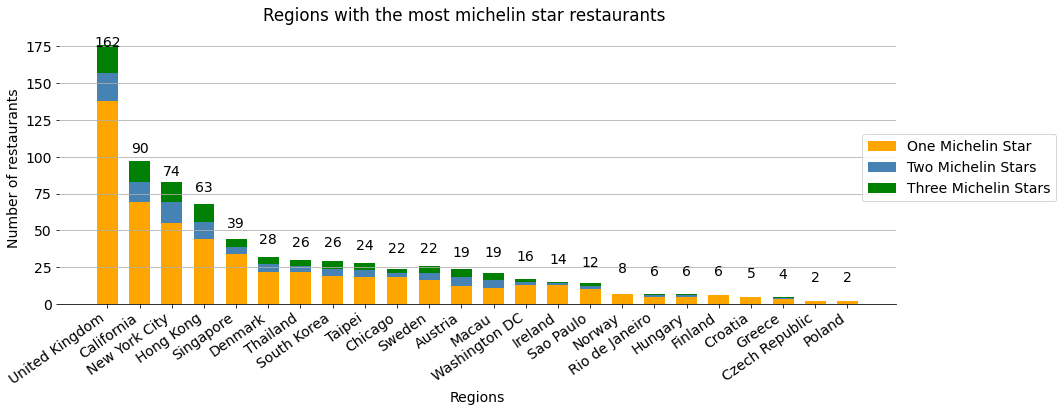

In [12]:
estrellas_michelin_df_pivot = pd.pivot_table(estrellas_michelin_df, values='name', index=['region'],
                     columns=['star'],aggfunc='count',fill_value=0,margins=True,margins_name='total')
estrellas_michelin_df_pivot.sort_values(by='total',ascending=False,inplace=True)
estrellas_michelin_df_pivot
# Llamamos a la función que montaran la gráfica
fig,ax=plot_region_michelin_star(estrellas_michelin_df_pivot[1:])

#Establecemo el título
titulo = 'Regions with the most michelin star restaurants'
fig.suptitle(titulo, y=.95);


## Ejercicio 4

¿Dónde se encuentran los restaurantes con estrellas en Reino Unido? Indicar el número de estrellas de cada uno.

In [13]:
#Filtramos por United Kingdom en la columna regions

estrellas_michelin_df_uk=estrellas_michelin_df[estrellas_michelin_df['region']=='United Kingdom'].reset_index(drop=True)

# Transformamos el DataFrame en un GeoDataFrame.
estrellas_michelin_df_uk['point'] = estrellas_michelin_df_uk.apply(
    lambda row: wkt.loads(f'POINT({row["longitude"]:.4f} {row["latitude"]:.4f})'), axis=1
)

# Eliminamos las entradas a las que les falte longitud o latitud.
estrellas_michelin_df_uk = estrellas_michelin_df_uk[~estrellas_michelin_df_uk['longitude'].isna() & ~estrellas_michelin_df_uk['latitude'].isna()]

estrellas_michelin_df_uk = gpd.GeoDataFrame(estrellas_michelin_df_uk, geometry='point')
estrellas_michelin_df_uk.sample(5)

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,star,point
11,HRiSHi,2019,54.35013,-2.911720,Bowness-on-Windermere,United Kingdom,LA23 3NE,Modern cuisine,NaN,https://guide.michelin.com/gb/en/cumbria/bowne...,1,POINT (-2.91170 54.35010)
51,Paco Tapas,2019,51.44647,-2.593580,Bristol,United Kingdom,BS1 6FU,Spanish,NaN,https://guide.michelin.com/gb/en/south-glouces...,1,POINT (-2.59360 51.44650)
138,Andrew Fairlie at Gleneagles,2019,56.28339,-3.751490,Auchterarder,United Kingdom,PH3 1NF,Creative French,NaN,https://guide.michelin.com/gb/en/perth-and-kin...,2,POINT (-3.75150 56.28340)
86,The Ninth,2019,51.51875,-0.135007,Bloomsbury,United Kingdom,W1T 2NB,Mediterranean cuisine,NaN,https://guide.michelin.com/gb/en/greater-londo...,1,POINT (-0.13500 51.51870)
148,CORE by Clare Smyth,2019,51.51261,-0.203052,North Kensington,United Kingdom,W11 2PN,Modern British,NaN,https://guide.michelin.com/gb/en/greater-londo...,2,POINT (-0.20310 51.51260)


In [14]:
estrellas_michelin_df_uk.total_bounds

array([-6.5711, 49.1812,  1.1262, 57.5149])

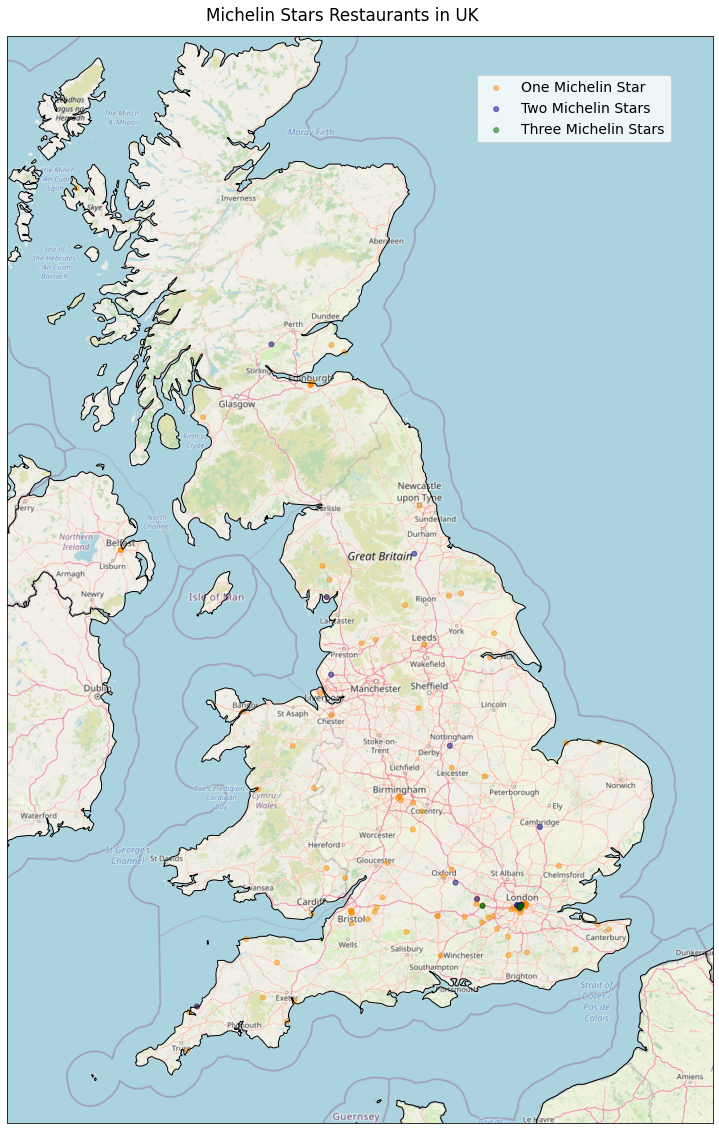

In [15]:
# Creamos unos ejes con la proyección Web Mercator.
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={
    'projection': gcrs.WebMercator()
})

# Obtenemos las longitudes y latitudes limítrofes.Le añadimos unos valores adcionales las longitudes y latitudes para 
# que "abrán" más el mapa.
extent = estrellas_michelin_df_uk.total_bounds+[-1,9.5,1.5,-8]

# Añadimos el fondo a la figura
gplt.webmap(estrellas_michelin_df_uk, ax=ax)

# Representamos los restaurantes de 1 estrella
gplt.pointplot(estrellas_michelin_df_uk[estrellas_michelin_df_uk['star']==1], ax=ax, label='One Michelin Star', color='darkorange', alpha=.5)

# Representamos los restaurantes de 2 estrellas
gplt.pointplot(estrellas_michelin_df_uk[estrellas_michelin_df_uk['star']==2], ax=ax, label='Two Michelin Stars', color='darkblue', alpha=.5)

# Representamos los restaurantes de 3 estrellas
gplt.pointplot(estrellas_michelin_df_uk[estrellas_michelin_df_uk['star']==3], ax=ax, label='Three Michelin Stars', color='darkgreen', alpha=.5,extent=extent)


# Hacemos visible el contorno del gráfico.
ax.spines['geo'].set_visible(True)

# Representamos la líneas de costa.
ax.coastlines()

# Representamos las líndes de los países.
# ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)

# # Añadimos la leyenda.    
#     ax.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title='Michelin stars')
# Añadimos la leyenda.
ax.legend(bbox_to_anchor=(0.95,0.97))

fig.suptitle("Michelin Stars Restaurants in UK",y=.90);

## Ejercicio 5

¿Cuantos premios se reparten cada año de cada tipo? ¿Hay de algún tipo que se reparta por encima del resto?

In [16]:
estrellas_michelin_df_pivot_age = pd.pivot_table(estrellas_michelin_df, values='name', index=['star'],
                     columns=['year'],aggfunc='count',fill_value=0,margins=True,margins_name='total')
estrellas_michelin_df_pivot_age.sort_values(by='total',ascending=False)

year,2018,2019,total
star,,,
total,39,656,695
1,34,515,549
2,5,105,110
3,0,36,36


In [17]:
df_19=estrellas_michelin_df_pivot_age[2019]
df_18=estrellas_michelin_df_pivot_age[2018]

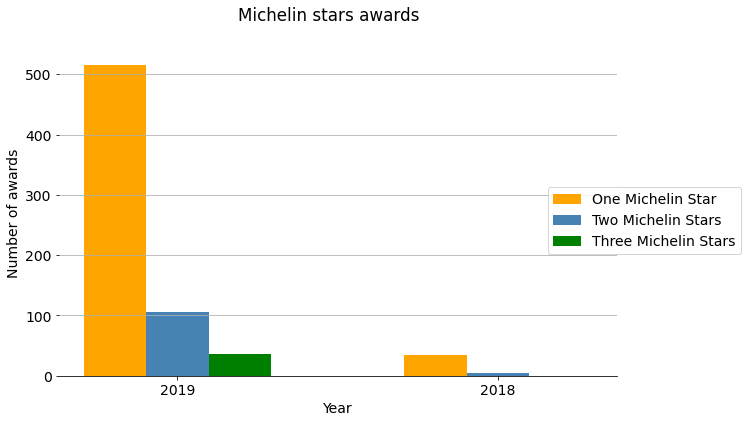

In [18]:
star_colors = [
    'orange',
    'steelblue',
    'green'
]
star_type=[
    'One Michelin Star',
    'Two Michelin Stars',
    'Three Michelin Stars'   
]
fig, ax = plt.subplots(figsize=(10, 6))

number_of_groups = 2
number_of_bars_per_group = 3
width=0.35
group_labels=['2019', '2018']
labels=df_19.index.values

# Calculamos la distancia entre los grupos.
distance = width * (number_of_bars_per_group + 1)

# Calculamos la posición central de cada grupo.
ticks = np.linspace(1, distance * number_of_groups, number_of_groups)

for i, (bar_1, bar_2, color) in enumerate(zip(df_19,df_18, star_colors)):
    # Calculamos la posición relativa de cada partido en su grupo.
    relative_position = ((1 - number_of_bars_per_group)/2 + i) * width
    # Representamos la barra.
    ax.bar(
        ticks + relative_position,
        (bar_1, bar_2),
        width=width,
        color=color,
        label=star_type[i]#str(labels[i])+'-'+ 'Michelin Star'
    )

#     ax.text(x=(ticks + relative_position)[0],y=bar_1/2, s="%d\n"%(bar_1) , ha='center', va='baseline' ,fontdict=dict(fontsize=14))
#     ax.text(x=(ticks + relative_position)[1],y=bar_2/2, s="%d\n"%(bar_2) , ha='center', va='baseline' ,fontdict=dict(fontsize=14))
        
    
# Añadimos la leyenda.    
ax.legend(loc='upper center',bbox_to_anchor=(1.05, 0.6))
    
# Eliminamos el marco y añadimos la cuadrícula.
ax.grid(True, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Etiquetamos la figura.
ax.set_xticks(ticks)
ax.set_xticklabels(group_labels)

ax.set_ylabel('Number of awards')
ax.set_xlabel('Year')

fig.suptitle("Michelin stars awards");